<h1><center>  projet : Analyse de données </center></h1>
<h1><center>  AIRBNB NEW YORK </center></h1>

Lecture des données brutes du fichier New York City Airbnb  
source kaggle "https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data"

# Lecture des données brutes du fichier New York City Airbnb  

In [87]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib as mp
import seaborn as sns
import sklearn as skl
import matplotlib.pyplot as plt

In [88]:


df = pd.read_csv('ABNYC.csv')

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Notre fichier comprend 48895 données et est beaucoup trop volumineux pour être transféré sur my sql.

## suppression des données manquantes

Nous décidons de supprimer toutes les lignes vides dans la base (données non exploitables)
on passe de 48895 données à 38 821 données soit une épuration de 20% de nos données.

In [90]:
last_review2 = df.last_review.dropna()
last_review2 

0        2018-10-19
1        2019-05-21
3        2019-07-05
4        2018-11-19
5        2019-06-22
            ...    
48782    2019-07-07
48790    2019-07-07
48799    2019-07-07
48805    2019-07-07
48852    2019-07-08
Name: last_review, Length: 38843, dtype: object

In [91]:
df2 = df.dropna()
df2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [92]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     

Nous n'avons plus de données manquantes, cependant la taille de notre fichier est toujours conséquente.

Nous essayons de modifier la capacité de la base de données , et l'import de la base dans SQL reste impossible.


## choix des colonnes que nous jugeons intéressantes pour l'analyse

suppression des colonnes que nous jugeons non pertinantes pour l'analyse, nous passons de 16 à 9 colonnes

In [94]:
mycolumns = ['id','host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights','number_of_reviews','availability_365']
airbnb = df2[mycolumns]
airbnb.head()

,id,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
0,2539,2787,John,Brooklyn,Kensington,Private room,149,1,9,365
1,2595,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,355
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,194
4,5022,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0
5,5099,7322,Chris,Manhattan,Murray Hill,Entire home/apt,200,3,74,129


## Exportation du nouveau DatSet en csv


In [95]:
airbnb.to_csv('airbnb.csv', index=False)

In [96]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   38821 non-null  int64 
 1   host_id              38821 non-null  int64 
 2   host_name            38821 non-null  object
 3   neighbourhood_group  38821 non-null  object
 4   neighbourhood        38821 non-null  object
 5   room_type            38821 non-null  object
 6   price                38821 non-null  int64 
 7   minimum_nights       38821 non-null  int64 
 8   number_of_reviews    38821 non-null  int64 
 9   availability_365     38821 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 3.3+ MB


le fichier étant toujours trop gros pour l'import, nous sélectionnons une partie des données 

In [52]:
airbnb.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Harlem', 'Greenpoint', 'Bushwick', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Flatbush', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

# analyse globale des données

In [100]:
airbnb.describe[neighbourhood_group','neighbourhood','room_type','price','minimum_nights','number_of_reviews','availability_365']

SyntaxError: invalid syntax (<ipython-input-100-1c8cf4dcf24f>, line 1)

In [114]:
mycolumns = ['neighbourhood_group', 'neighbourhood','room_type', 'price', 'minimum_nights','availability_365']
airbnb =[mycolumns].describe.()

SyntaxError: invalid syntax (<ipython-input-114-38ecd68a8d27>, line 2)

In [102]:
airbnb.describe()

,id,host_id,price,minimum_nights,number_of_reviews,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,142.332526,5.869220,29.290255,114.886299
std,1.069372e+07,7.589752e+07,196.994756,17.389026,48.182900,129.529950
min,2.539000e+03,2.438000e+03,0.000000,1.000000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,69.000000,1.000000,3.000000,0.000000
50%,1.887286e+07,2.837092e+07,101.000000,2.000000,9.000000,55.000000
75%,2.756746e+07,1.018905e+08,170.000000,4.000000,33.000000,229.000000
max,3.645581e+07,2.738417e+08,10000.000000,1250.000000,629.000000,365.000000


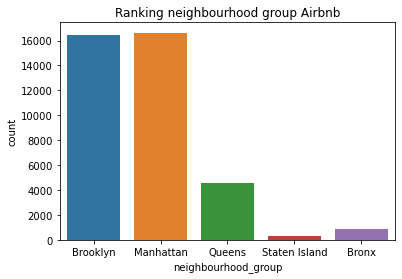

In [103]:
sns.countplot(airbnb['neighbourhood_group'])
plt.title('Ranking neighbourhood group Airbnb')
plt.show()

Brooklyn et Manhattan sont des quartiers où la plupart des gens aiment prendre un Airbnb.

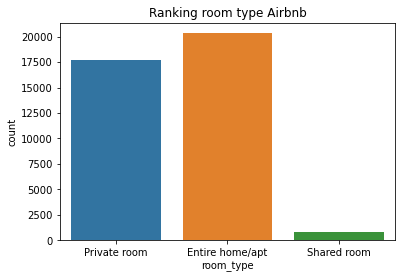

In [104]:
sns.countplot(airbnb['room_type'])
plt.title('Ranking room type Airbnb')
plt.show()

Chambre privée et Maison / appartement entier sont le type de chambre le plus représenté dans les données.

In [105]:
round(airbnb['price'].mean())

142

prix moyen 142 €

In [106]:
airbnb.groupby('neighbourhood_group').price.agg(['mean', 'min', 'max'])


,mean,min,max
neighbourhood_group,,,
Bronx,79.558857,0,800
Brooklyn,121.463289,0,10000
Manhattan,180.071596,10,9999
Queens,95.783683,10,10000
Staten Island,89.964968,13,625


In [ ]:
prix moyen des airbnb à ny par quartier
à vérifier dans la base si on a bien ce genre de prix max

In [115]:
mycolumns = ['neighbourhood_group', 'neighbourhood','room_type', 'price', 'minimum_nights','availability_365']
airbnb = df[mycolumns]

In [8]:
airbnb.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,availability_365
0,Brooklyn,Kensington,Private room,149,1,365
1,Manhattan,Midtown,Entire home/apt,225,1,355
2,Manhattan,Harlem,Private room,150,3,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,0


In [117]:
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

NameError: name 'pearsoncorr' is not defined

In [10]:
airbnb.corr()

,price,minimum_nights,availability_365
price,1.000000,0.042799,0.081829
minimum_nights,0.042799,1.000000,0.144303
availability_365,0.081829,0.144303,1.000000


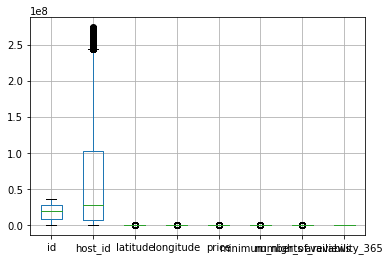

In [53]:
airbnb.boxplot()

In [118]:
airbnb.groupby('neighbourhood').price.describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Allerton,42.0,87.595238,73.048617,33.0,47.00,66.5,104.75,450.0
Arden Heights,4.0,67.250000,18.300729,41.0,62.75,72.5,77.00,83.0
Arrochar,21.0,115.000000,133.119120,32.0,34.00,65.0,125.00,625.0
Arverne,77.0,171.779221,193.347902,35.0,75.00,125.0,200.00,1500.0
Astoria,900.0,117.187778,349.898287,25.0,60.00,85.0,120.00,10000.0
...,...,...,...,...,...,...,...,...
Windsor Terrace,157.0,138.993631,84.630532,38.0,77.00,123.0,160.00,450.0
Woodhaven,88.0,67.170455,40.527335,10.0,45.00,52.0,70.25,250.0
Woodlawn,11.0,60.090909,19.821476,29.0,42.50,68.0,73.50,85.0


In [119]:
airbnb.groupby('neighbourhood_group').price.describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.383207,186.873538,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0
